<a href="https://colab.research.google.com/github/MattFinney/practical_data_science_in_python/blob/main/solutions/Session_1_Introduction_to_Data_Science_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/><a>

# Introduction to Data Science
## Core Concepts and Exploratory Data Analysis
Authors: Paulina Toro Isaza, Matthew Finney


---

## Agenda

1.   What is Data Science?
2.   Concepts and Methods
3.   Deep Dive: Music Recommendation
4.   Demo: Exploratory Data Analysis in Python

---

## What is Data Science?

![image.png](https://imgur.com/maii0F6.png)


Source: [A New Venn Diagram by Pierluigi Casale](https://open-dse.github.io/new-venn-diagram/)



### The Data Science Process

![data_iceberg.png](https://imgur.com/pxivm3x.png)

1. Formulate your Question
2. Get, Clean, and Transform the Data
3. Explore the Data
4. Model the Data
5. Communicate the Results

### Applications

*   Why does a video or meme go viral?
*   How can we better identify and predict disease?
*   Recommendation systems for music, movies, and other products
*   Language translation

---

## Concepts, Methods, and Applications


### Concepts

#### Predicting vs. Explaining

**Predicting**: Estimate some value based on input data.

> What will be the box office opening for a film?

**Explaining**: Determine how factors affect a particular outcome.

> What factors influence the box office opening of a film?  

---

#### Supervised vs. Unsupervised

**Supervised**: We know the "true" values of our output data.

> What is the genre of a book?

In the supervised case, each book will already be assigned a particular genre such as mystery, romance, fantasy, or memoir. Our model will be taught to predict the genre and our predictions will be compared to the "true" genre.

**Unsupervised**: We don't know the "true" values of our output data.

> What groupings differentiate between types of books best?

In the unsupervised case, our books are not already labelled with a genre. Instead, our model will try to create it's own labels based on whatever characteristics we pass in. Our results might mimic traditional genres or might show some unexpected groupings that challenge our notion of traditional genres!

--- 

#### Regression vs. Classification

**Regression**: The response variable for what we are trying to predict or explain is numerical. 

> How many views do we expect a particular YouTube video to have based on its title, thumbnail, subscriber count for the channel, and view count of the previous video on the channel?

**Classification**: The response variable for what we are trying to predict or explain is categorical. 

> How can we predict that a YouTube video is not suitable for children under 13 based on title and thumbnail?


---

### Methods

![methods.png](https://imgur.com/7mlirpP.png)

---

## Deep Dive: Music Recommendation

### Context

What happens when you reach the end of a playlist on platforms like Spotify or Youtube? Do you find yourself skipping the next song or did the platform give you a good follow-up to what you were listening to?

### Goal: How can we use data science methods to create playlists of similar songs?

#### Methods

**Unsupervised learning**: Our dataset does not contain any information about playlists or genres, so data is unlabeled. We don't know the "true" values of the genre or playlist.

**Dimension Reduction**: Our dataset contains about a dozen audio features used to describe a single song. Because it's hard to visualize information in more than three dimensions, we might want to reduce the number of dimensions in some way. 

**Classification**: This might sound like a classification problem because we want to classify songs as belonging to different playlists (genres). However, we usually talk about classification methods as those done in supervised learning.

**Clustering**: We'll be using this machine learning algorithm to partition the dataset into a pre-defined number of groups. The partitions do no rely on knowing the "true" values of the groups.



---

## Demo: Exploratory Data Analysis in Python

#### Importing Libraries

We need to tell Python what kind of functionality we want for our code. Instead of loading every single possible functionality, Python works by *importing* particular libraries so that we only have access to what's necessary.

There are many libraries such as those working with websites, audio, or social networks. But ince we are going to be working with data, we want to only import data related libraries. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('Set1')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

**Pandas**: Open source data analysis and manipulation tool for Python. Industry standard.

**NumPy (Numerical Python)**: Open source tool for working with arrays, matrices, linear algebra, and other numerical operations in Python.

**Matplotlib**: Open source data visualization tool for creating plots, graphs, and other visuals. Typically used for more basic visuals.

**Seaborn**: Another open source data visualization tool in Python. Has more variety than matplotlib and comparatively simpler syntax. 

### Pre-Set Functions and Variables

No need to worry about understanding this code! Just be sure to run it before running anything else. 

In [2]:
# Data file path
file_path = 'https://raw.githubusercontent.com/MattFinney/practical_data_science_in_python/main/spotify_track_data.csv'

# Relevant columns
audio_feature_cols = ['danceability', 'energy', 'key', 'loudness', 'mode', 
                      'speechiness', 'acousticness', 'instrumentalness',
                      'liveness', 'valence', 'tempo', 'duration_ms',
                      'time_signature']

### Load the Data

Pandas lets you easily read in a CSV file as a **DataFrame**, the primary dat astructure for pandas. It is essentially a table where each record is a row with different features as columns.

In [3]:
tracks_df = pd.read_csv(file_path)

### Display Head and Summary

After reading in the data, we want to make sure we've read it in correctly.

This is most easily done by displaying the head, or top, of the DataFrame.

In [4]:
tracks_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,track_href,analysis_url,duration_ms,time_signature,preview_url,cover_url,name,artist
0,0.753,0.704,5,-5.562,1,0.0843,0.259,0.143000,0.1030,0.800,93.951,audio_features,4Z9npQ93MrnIkRcTBKwSa3,https://api.spotify.com/v1/tracks/4Z9npQ93MrnI...,https://api.spotify.com/v1/audio-analysis/4Z9n...,91465,4,https://p.scdn.co/mp3-preview/1fa0d4bcb13eba09...,https://i.scdn.co/image/ab67616d0000b273a31dd5...,Looks,Steve Lacy
1,0.646,0.286,2,-12.361,1,0.0380,0.073,0.000020,0.0325,0.158,77.161,audio_features,4AyF3otW64PCw45b1ENW77,https://api.spotify.com/v1/tracks/4AyF3otW64PC...,https://api.spotify.com/v1/audio-analysis/4AyF...,330033,4,https://p.scdn.co/mp3-preview/09a0f6ff0da6c292...,https://i.scdn.co/image/ab67616d0000b273d3444f...,Fruitflies,Gabriel Garzón-Montano
2,0.658,0.294,4,-8.533,0,0.0321,0.422,0.000052,0.0749,0.358,74.038,audio_features,7zFXmv6vqI4qOt4yGf3jYZ,https://api.spotify.com/v1/tracks/7zFXmv6vqI4q...,https://api.spotify.com/v1/audio-analysis/7zFX...,278180,4,https://p.scdn.co/mp3-preview/004e53a751e628eb...,https://i.scdn.co/image/ab67616d0000b2733138f8...,Get You (feat. Kali Uchis),Daniel Caesar
3,0.741,0.562,8,-4.739,0,0.0867,0.226,0.000062,0.0596,0.707,77.477,audio_features,1d3RMBeBUq9frA2GRJRUA0,https://api.spotify.com/v1/tracks/1d3RMBeBUq9f...,https://api.spotify.com/v1/audio-analysis/1d3R...,255267,4,https://p.scdn.co/mp3-preview/0bfd44fe314d4a38...,https://i.scdn.co/image/ab67616d0000b273bc734b...,The Distance,Gavin Turek
4,0.772,0.256,7,-8.545,0,0.0481,0.491,0.006120,0.1440,0.357,118.902,audio_features,2k9N4caeCIJLOWwWwssrEM,https://api.spotify.com/v1/tracks/2k9N4caeCIJL...,https://api.spotify.com/v1/audio-analysis/2k9N...,210240,3,https://p.scdn.co/mp3-preview/553a07ba23de1814...,https://i.scdn.co/image/ab67616d0000b273e6dfae...,Easily,Bruno Major


Another way to get a good, quick overview of the data is to look at the summary description. This can give us an idea of whether or not the range of values for numerical data makes sense or how much data is missing for a particular column.

In [5]:
tracks_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,0.496892,0.442840,4.791045,-15.511903,0.664179,0.321713,0.775393,0.388100,0.333891,0.337711,106.850634,219700.410448,3.679104
std,0.148682,0.375186,3.487967,9.750280,0.473160,0.392849,0.277984,0.450423,0.323365,0.207374,32.842679,112690.727886,0.698857
min,0.125000,0.001960,0.000000,-34.755000,0.000000,0.027500,0.000342,0.000000,0.032500,0.047800,57.906000,34507.000000,1.000000
25%,0.395750,0.046450,1.000000,-25.812250,0.000000,0.040475,0.716000,0.000000,0.101000,0.181000,80.199000,148550.000000,3.000000
50%,0.488000,0.384500,5.000000,-11.152500,1.000000,0.052750,0.857000,0.001017,0.116000,0.284000,103.487500,190432.500000,4.000000
75%,0.574000,0.848500,8.000000,-7.051500,1.000000,0.878250,0.992000,0.932000,0.676750,0.453250,127.187750,255493.500000,4.000000
max,0.897000,0.993000,11.000000,-2.306000,1.000000,0.960000,0.996000,0.966000,0.974000,0.974000,205.477000,987267.000000,5.000000


### Display Data Types

It's also helpful to make sure the columns were read in as the correct data types as some functions and analyses can only be done with certain types.

In [6]:
tracks_df.dtypes

danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
type                 object
id                   object
track_href           object
analysis_url         object
duration_ms           int64
time_signature        int64
preview_url          object
cover_url            object
name                 object
artist               object
dtype: object

* **float64**: Decimal number
* **int64**: Integer (whole) number
* **object**: String with alphanumeric characters, not treated as a number

### Small Note about Cleaning

Data will often be in a format that's hard to work with or will have errors.  A large portion of data science work involves cleaning or restructuring data for proper use. 

In this workshop, we will be using data that has already been cleaned and structured in the way we want it. 


### High Level Exploratory Data Analysis Charts



#### Distribution Plots

Such plots are an easy way to quickly gain important information about a numerical data features. The visualization gives us an idea about what the most common values are, how spread out they are, what the complete range is, and what might be some outliers.


##### Dancibility

Text(0, 0.5, 'tracks')

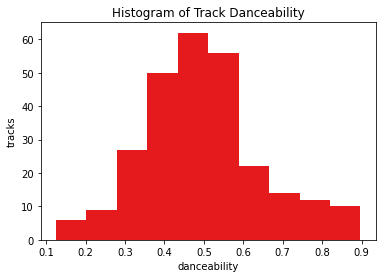

In [7]:
# matplotlib histogram / distribution plot
plt.hist(tracks_df['danceability'])

# Title and labels
plt.title('Histogram of Track Danceability')
plt.xlabel('danceability')
plt.ylabel('tracks')

Takeaways


##### Acousticness

Text(0, 0.5, 'tracks')

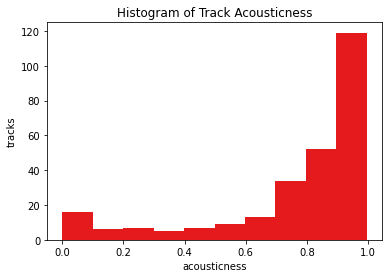

In [8]:
# matplotlib histogram / distribution plot
plt.hist(tracks_df['acousticness'])

# Title and labels
plt.title('Histogram of Track Acousticness')
plt.xlabel('acousticness')
plt.ylabel('tracks')

Takeaways

##### Tempo

Text(0, 0.5, 'tracks')

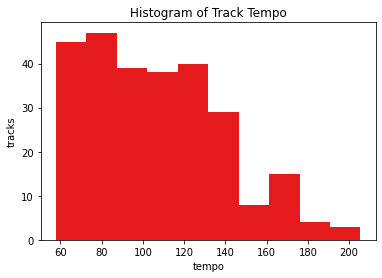

In [9]:
# matplotlib histogram / distribution plot
plt.hist(tracks_df['tempo'])

# Title and labels
plt.title('Histogram of Track Tempo')
plt.xlabel('tempo')
plt.ylabel('tracks')

#### Correlation

Scatterplots of two variables can help us visualize the relationship between them. If two variables are highly correlated (or related), we might consider only using one of them in our model. 


Text(0, 0.5, 'Loudness')

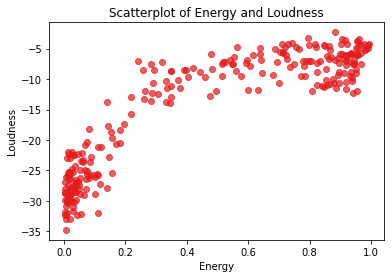

In [10]:
# matplotlib scatter plot
plt.scatter(tracks_df['energy'], tracks_df['loudness'], alpha = 0.7)

# Title and labels
plt.title("Scatterplot of Energy and Loudness")
plt.xlabel("Energy")
plt.ylabel("Loudness")

### Dimensionality Reduction
In the graph above, we were able to visualize the relationship between two variables, energy and loudness. However, our dataset has thirteen variables containing audio information. That's a lot of data to try to visualize at once. Thus, a common tactic is to reduce the *dimension* of the data in some way. 

#### Principal Components Analysis
The first method we're going to try is called Principal Components Analysis (PCA). 

Because we are using functionality that is not a part of the base Python, we need to import additional libraries.

In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

##### PCA Function
We've already written and run function for performing the PCA and visualizing the first two principal components as it's easiest for people to visualize data using two or three dimensions. It was already run in code above.

In [12]:
# Put this up with other functions

rs = 123
np.random.seed(rs)

def pca_plot(df, classes=None):

    # Scale data for PCA
    scaled_df = StandardScaler().fit_transform(df)
    
    # Fit the PCA and extract the first two components
    pca_results = PCA().fit_transform(scaled_df)
    pca1_scores = pca_results[:,0]
    pca2_scores = pca_results[:,1]
    
    # Sort the legend labels
    if classes is None:
      hue_order = None
      n_classes = 0
    elif str(classes[0]).isnumeric():
      classes = ['Cluster {}'.format(x) for x in classes]
      hue_order = sorted(classes)
      n_classes = np.max(np.unique(classes).shape)
    else:
      hue_order = sorted(classes)
      n_classes = np.max(np.unique(classes).shape)

    # Plot the first two principal components
    plt.figure(figsize=(8.5,8.5))
    plt.grid()
    sns.scatterplot(pca1_scores,pca2_scores, s=50, hue=classes,
                    hue_order=hue_order)
    plt.xlabel("Principal Component {}".format(1))
    plt.ylabel("Principal Component {}".format(2))
    plt.title('Principal Component Plot')
    plt.show()

##### Principal Component Plot

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


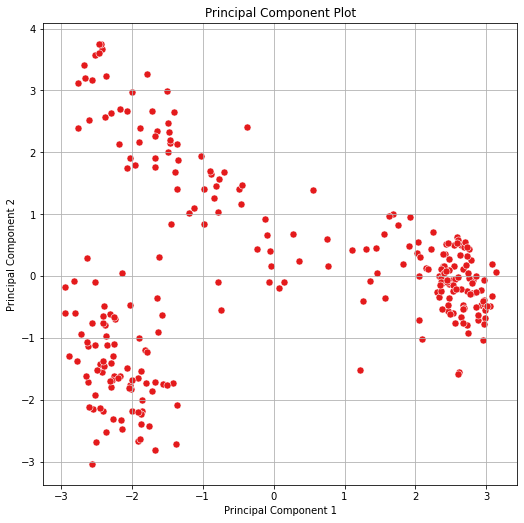

In [13]:
pca_plot(tracks_df[audio_feature_cols])

Takeways

## Next Session
Session 2: Practical Data Science in Python  
Thursday, October 1 | 1:30pm - 2:45pm PDT  
https://careermingle2020.sched.com/event/dtq3

Our next session will be a live coding demo continuing our Spotify case study. We will:
* Introduce a common unsupervised learning technique, k-means clustering, to classify songs by similarity. 
* Create visuals using k-means clustering to see groupings
* Test our results!